In [2]:
#basic libraries
import os
import numpy as np
import pandas as pd
import scipy
import sklearn
#import cv2
from __future__ import print_function
from skimage import io

ImportError: DLL load failed: The specified module could not be found.

In [1]:
#import keras
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib import pyplot as plt

Using TensorFlow backend.


We are building a 'cat' image classifier from local storage

(1, 128, 128, 3)
(1, 128, 128, 3)


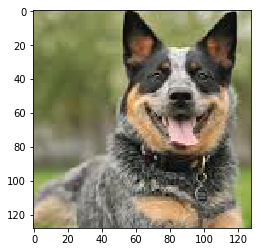

In [3]:
#dataflow from local storage
#local img for traing
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
#cats
img_orig1 = load_img('cat_orig.png')
plt.imshow(img_orig1)
img_train1 = img_to_array(img_orig1)
img_train1 = img_train1.reshape((1,) + img_train1.shape)
print(img_train1.shape)

#augmentation for training cats
i = 0
for batch in datagen.flow(img_train1, batch_size=1,
                          save_to_dir='data/train/cats', save_prefix='train', save_format='jpeg'):
    i += 1
    if i > 50:
        break

#dogs
img_orig2 = load_img('dog_orig.png')
plt.imshow(img_orig2)
img_train2 = img_to_array(img_orig2)
img_train2 = img_train2.reshape((1,) + img_train2.shape)
print(img_train2.shape)
#augmentation for training dogs
i = 0
for batch in datagen.flow(img_train2, batch_size=1,
                          save_to_dir='data/train/dogs', save_prefix='train', save_format='jpeg'):
    i += 1
    if i > 50:
        break

(1, 128, 128, 3)
(1, 128, 128, 3)


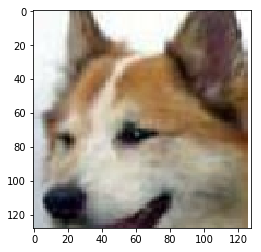

In [4]:
#local img for test

#cats
img_new1 = load_img('cat_test.png')
plt.imshow(img_new1)
img_test1 = img_to_array(img_new1)
img_test1 = img_test1.reshape((1,) + img_test1.shape)
print(img_test1.shape)        
#augmentation for testing cats
i = 0
for batch in datagen.flow(img_test1, batch_size=1,
                          save_to_dir='data/test/cats', save_prefix='test', save_format='jpeg'):
    i += 1
    if i > 5:
        break
        
#dogs
img_new2 = load_img('dog_test.png')
plt.imshow(img_new2)
img_test2 = img_to_array(img_new2)
img_test2 = img_test1.reshape((1,) + img_test2.shape)
print(img_test2.shape)        
#augmentation for testing cats
i = 0
for batch in datagen.flow(img_test2, batch_size=1,
                          save_to_dir='data/test/dogs', save_prefix='test', save_format='jpeg'):
    i += 1
    if i > 5:
        break

build and compile the CNN model

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Now, do the basic initialisation of various image hyperparameters

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/test'
nb_train_samples = 100
nb_validation_samples = 20
epochs = 5
batch_size = 50

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape)

(150, 150, 3)


Let's add the train and test images to the respective data generators

In [7]:
# this is the augmentation configuration we will use for training:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=['dogs','cats'],
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=['dogs','cats'],
    class_mode='binary')

Found 1088 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


Finally, let's train the model

In [8]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples)

model.save_weights('first_try.h5')

Epoch 1/5
100/100 [==============================] - 267s - loss: 0.2472 - acc: 0.9118 - val_loss: 1.8365 - val_acc: 0.5695
Epoch 2/5
100/100 [==============================] - 249s - loss: 0.1722 - acc: 0.9838 - val_loss: 2.7201 - val_acc: 0.4630
Epoch 3/5
100/100 [==============================] - 240s - loss: 4.8912 - acc: 0.6855 - val_loss: 5.2682 - val_acc: 0.4283
Epoch 4/5
100/100 [==============================] - 256s - loss: 0.1767 - acc: 0.9832 - val_loss: 3.6625 - val_acc: 0.4271
Epoch 5/5
100/100 [==============================] - 252s - loss: 3.9834e-04 - acc: 1.0000 - val_loss: 4.3999 - val_acc: 0.4563


THE PROOF OF THE PUDDING IS IN THE EATING

(1, 150, 150, 3)
1/1 [==============================] - 0s
[[1]]


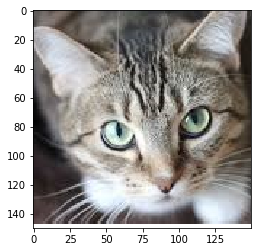

In [9]:
#load the validation img - CAT
testimg1 = load_img('cat6.png')
plt.imshow(testimg1)
test_img1 = img_to_array(testimg1)
test_img1 = test_img1.reshape((1,) + test_img1.shape)
print(test_img1.shape)
#predict with our model
classes = model.predict_classes(test_img1)
prob = model.predict_proba(test_img1)
print(classes)

(1, 150, 150, 3)
1/1 [==============================] - 0s
[[0]]


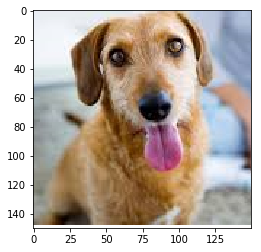

In [10]:
#load the validation img - DOG
testimg2 = load_img('dog6.png')
plt.imshow(testimg2)
test_img2 = img_to_array(testimg2)
test_img2 = test_img2.reshape((1,) + test_img2.shape)
print(test_img2.shape)
#predict with our model
classes = model.predict_classes(test_img2)
prob = model.predict_proba(test_img2)
print(classes[[0]])

In [11]:
from keras.preprocessing import image
img_path = 'cat6.jpg'
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(preds)
#print('Predicted:', decode_predictions(preds, top=1)[0])

[[ 1.]]


In [12]:
img_path = 'dog6.png'
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(preds)

[[ 0.]]
